In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [3]:
len(df_train),len(df_test)

(821, 199)

In [4]:
df_train.head()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,...,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = df_train.drop(columns=['year','banking_crisis','gdp_weighted_default'])
X_test = df_test.drop(columns=['year','banking_crisis','gdp_weighted_default'])

In [6]:
y_train = df_train.banking_crisis
y_test = df_test.banking_crisis

In [7]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

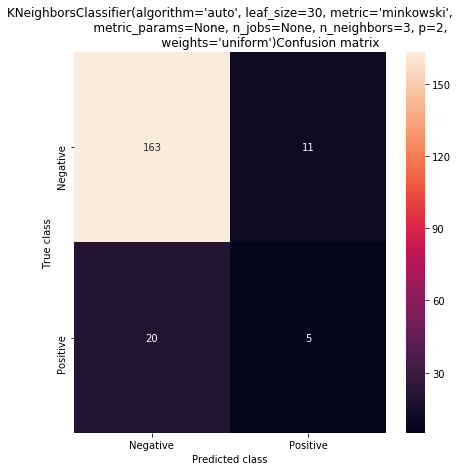

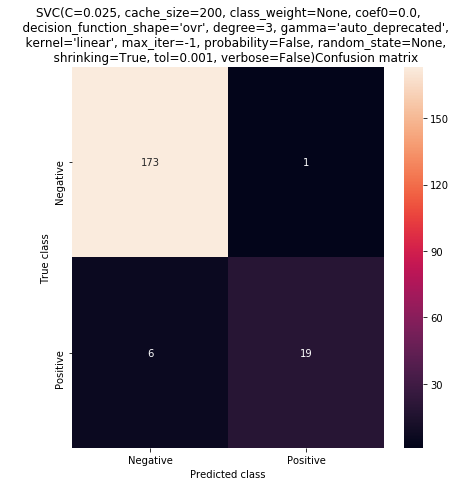

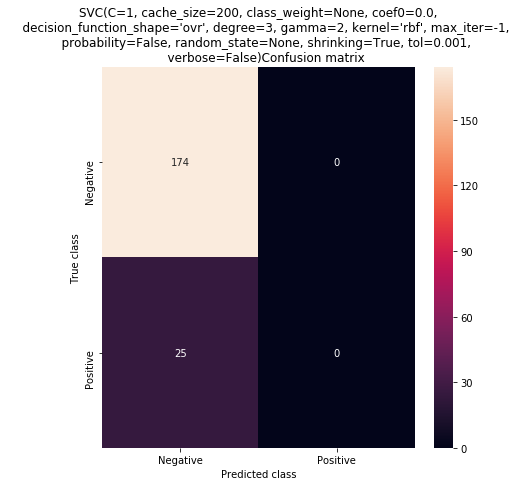

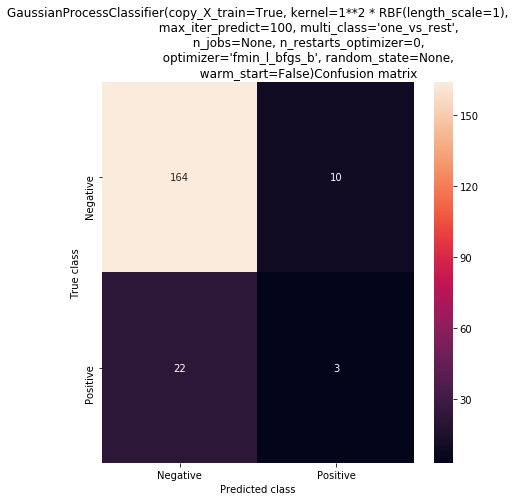

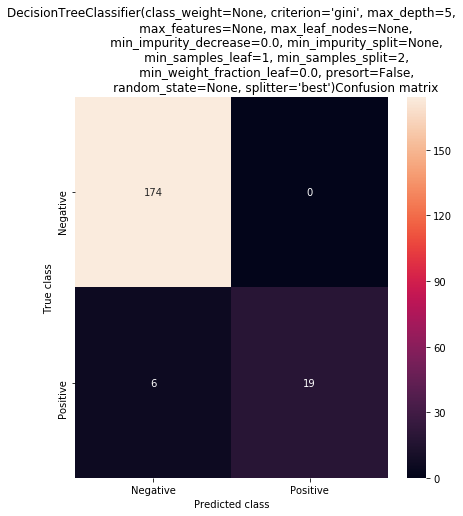

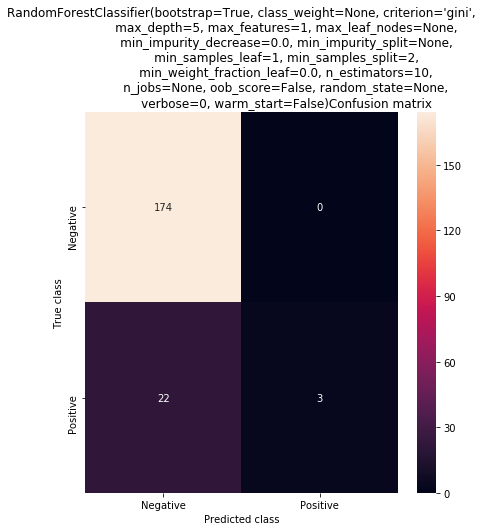

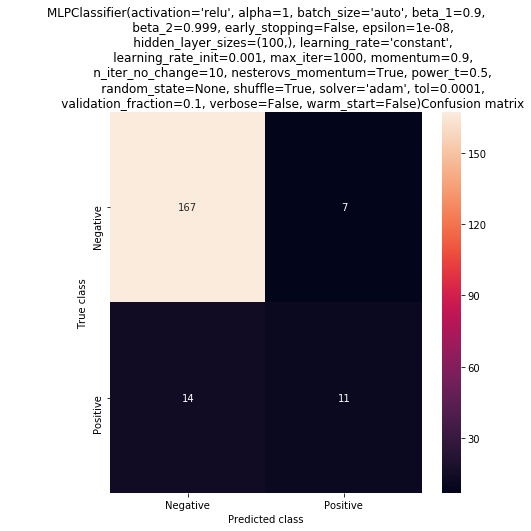

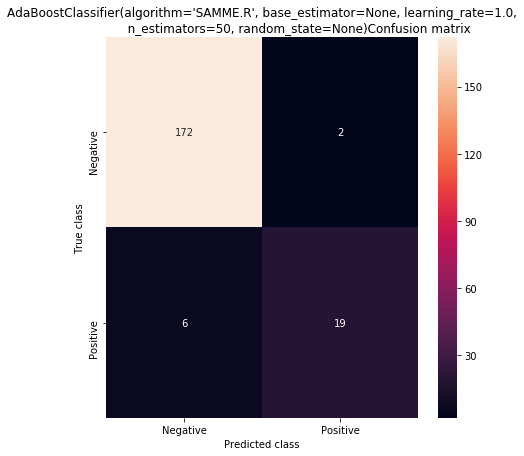

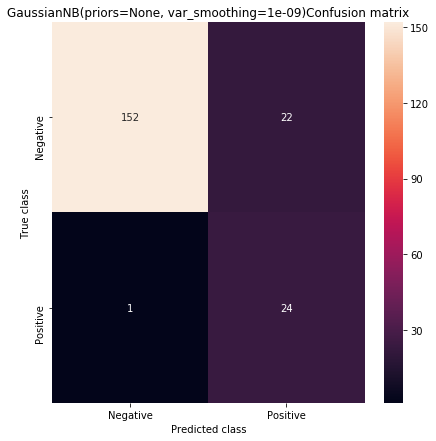

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


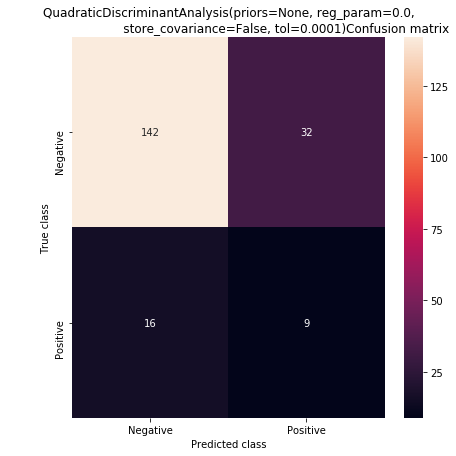

In [8]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 7))
    Label_name=['Negative','Positive']
    sns.heatmap(conf_matrix, xticklabels=Label_name, yticklabels=Label_name, annot=True, fmt="d")
    plt.title(str(clf) + "Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
def grid_search(clf, param_grid):
    # instantiate the grid
    grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    # fit the grid with data
    grid.fit(X_train, y_train)
    
    # examine the best model
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

    return grid.best_estimator_

In [11]:
clf_best = []

In [12]:
dtc = DecisionTreeClassifier()

# Define the parameter values that should be searched
sample_split_range = list(range(2, 50))
criterion = ['gini', 'entropy']
max_depth = list(range(2,10))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(min_samples_split=sample_split_range,
                  criterion=criterion,
                  max_depth=max_depth)

clf_best.append(grid_search(dtc, param_grid))

0.9719853836784409
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 44}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=44,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
abc = AdaBoostClassifier()

# Define the parameter values that should be searched
n_estimators = list(range(10,250,10))
learning_rate = [0.01,0.05,0.1,0.2,0.5,1]

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators,
                  learning_rate=learning_rate)

clf_best.append(grid_search(abc, param_grid))

0.9780755176613886
{'learning_rate': 0.01, 'n_estimators': 10}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=10, random_state=None)


C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
rfc = RandomForestClassifier()

param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': list(range(10,250,10))}

clf_best.append(grid_search(rfc, param_grid))

0.9719853836784409
{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
svc = SVC()

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf']

param_grid = dict(C=Cs,
                  gamma=gammas,
                  kernel=kernel)

clf_best.append(grid_search(svc, param_grid))

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9780755176613886
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


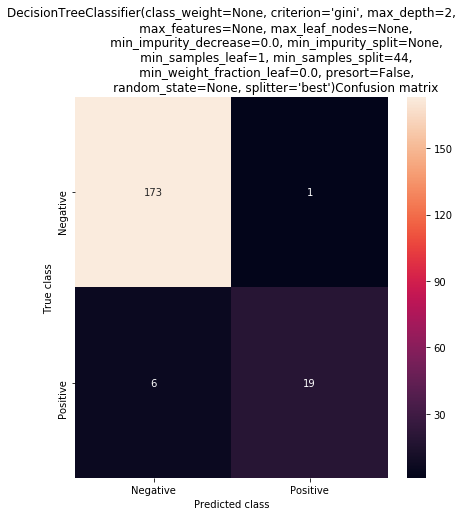

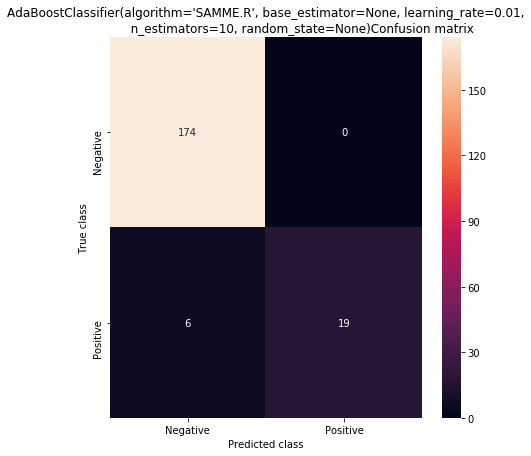

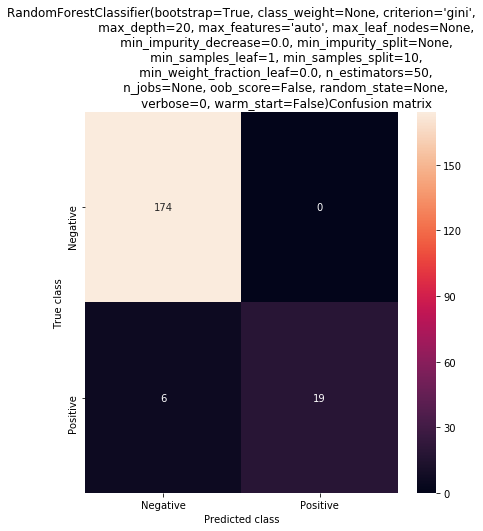

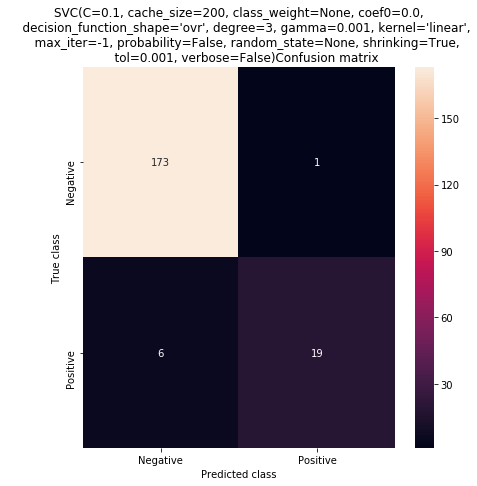

In [16]:
for clf in clf_best:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 7))
    Label_name=['Negative','Positive']
    sns.heatmap(conf_matrix, xticklabels=Label_name, yticklabels=Label_name, annot=True, fmt="d")
    plt.title(str(clf) + "Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [32]:
import joblib

In [34]:
joblib.dump(clf_best[0],'decision_tree_classifier.pickle')
joblib.dump(clf_best[1],'adaboost_tree_classifier.pickle')
joblib.dump(clf_best[2],'random_forest_classifier.pickle')
joblib.dump(clf_best[3],'svm_classifier.pickle')

['svm_classifier.pickle']